# Salary income in the U.S

##### For many people, salaries in the U.S are not equally distributed, and I do completely agree with this statement. 

##### On this work, I would be looking into what are the characteristics that influences the most if you expect or want to have a higher salary in the United States.

##### Using a dataset extracted from Kaggle, I will be looking into the influence that age, education level, marital status, occupation, race, gender and hours-per-week work have on the annual income.

### Dataset description

#### The dataset tries to establish a relation between some variables such as gender, work class, education, etc, and a salary higher or not than 50,000 USD. Why 50,000? I assume a salary higher than 50,000 is considered as a decent lifestyle taking into consideration the life cost in the U.S.

#### To get some insights from this data sets, we are mainly using graphics such as scatter plots, bar charts, area charts, and basically we would be seeing which chart represents more easily the information we want to deliver.

#### Some important information before we proceed. Higher than 50,000 will be represented as '1' and lower or equal than 50,000  will be represented as '0'

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the csv file
df = pd.read_csv('adult.csv')

In [3]:
#See how the data frame looks like
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Wrangling

In [4]:
#Shape of the data frame
df.shape

(48842, 15)

In [5]:
#See the type of each column
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
#List with the columns
columns = df.columns

In [7]:
df['workclass'].value_counts(ascending = False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df['native-country'].value_counts(ascending = False)

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [9]:
#The NaN values are written as '?'
df['workclass'] = df['workclass'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)

In [10]:
#Drop the values since there is no way for me to know how to fill a value and may distort the story.
df.dropna(how = 'any', inplace =True)

In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
#Replace values for 0 or 1 to see if the income is higher or not than 50k
df['income'] = df['income'].replace('<=50K', 0).replace('>50K', 1)

In [13]:
#Change income type to numeric
df['income'] = df['income'].astype(int)

In [14]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# Data Visualization

### Age and hours per week relationship

Does the age matter in hours worked per day?

Does more time working mean to have a salary higher than 50,000 USD?

In [15]:
#Divide the data frame in two. Higher than 50K and lower than 50 K
df_0 = df.loc[df['income'] == 0]
df_1 = df.loc[df['income'] == 1]

In [16]:
df_0

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


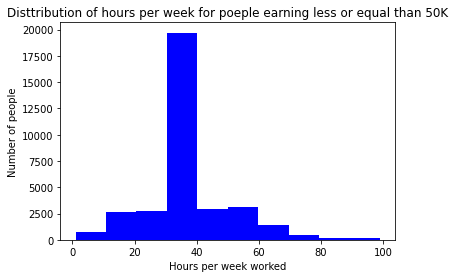

In [17]:
#See how is the distribution of the people that has less or equal than 50K for income
plt.hist(df_0['hours-per-week'], color = 'blue')
plt.xlabel('Hours per week worked')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning less or equal than 50K')
plt.show()

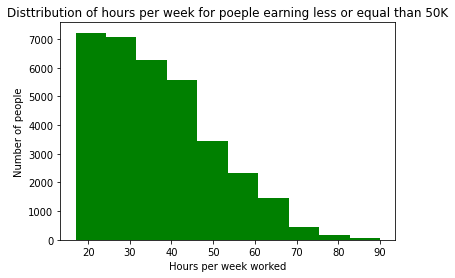

In [18]:
#See how is the distribution of the people that has less or equal than 50K for income
plt.hist(df_0['age'], color = 'green')
plt.xlabel('Hours per week worked')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning less or equal than 50K')
plt.show()

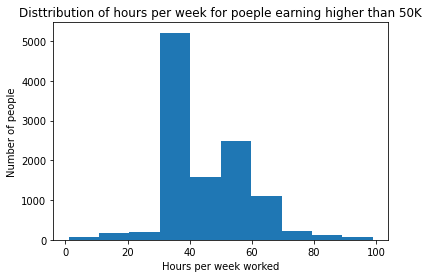

In [19]:
#See how is the distribution of the people that has higher than 50K for income
plt.hist(df_1['hours-per-week'])
plt.xlabel('Hours per week worked')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning higher than 50K')
plt.show()

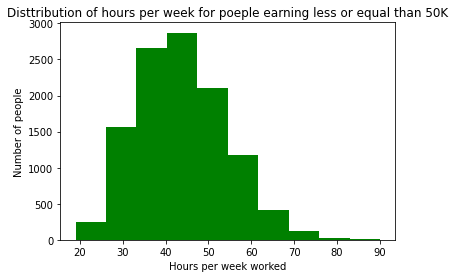

In [20]:
#See how is the distribution of the people that has less or equal than 50K for income
plt.hist(df_1['age'], color = 'green')
plt.xlabel('Hours per week worked')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning less or equal than 50K')
plt.show()

#### Conclusions 

1. There is not a difference of how the data is distributed. People earning more than 50,000 is almost equally distributed than people earning less or equal than 50,000


2. On the other hand, people on the 20's and 30's tend to have an income less or equal than 50,000, and people over 40 and 50 are the majority that earns more than 50,000. It is very uncommon to see someone on the 20's or older than 60 to earn more than 50,000.

### Race influence on the income

What is the inflence on the race and the income in the U.S?

In [21]:
df_group = df.groupby('race').agg({'income':'sum'})
df_group2 = df.groupby('race').agg({'income':'count'})

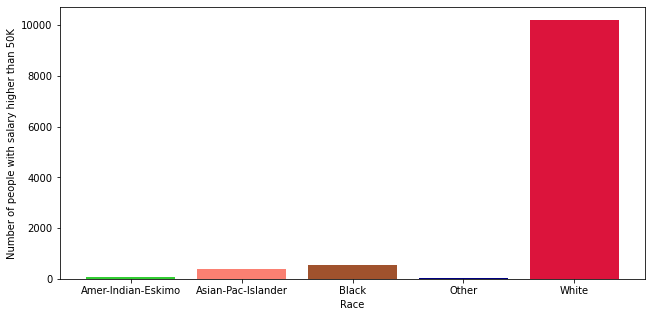

In [22]:
objects = list(df_group.index)
values = [53, 369, 534, 45, 10207]
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
plt.bar(objects, values, color = ['limegreen', 'salmon', 'sienna', 'navy', 'crimson'])
plt.xlabel('Race')
plt.ylabel('Number of people with salary higher than 50K')
plt.show()

In [23]:
values2 = [53/435, 369/1303, 534/4228, 45/353, 10207/38903]

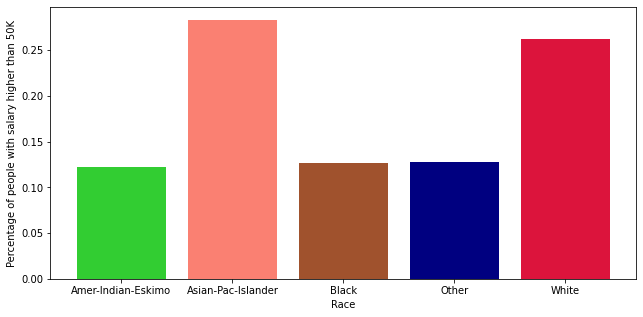

In [24]:
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
plt.bar(objects, values2, color = ['limegreen', 'salmon', 'sienna', 'navy', 'crimson'])
plt.xlabel('Race')
plt.ylabel('Percentage of people with salary higher than 50K')
plt.show()

#### Conclusions 

1. Most of the poeple interviewed were white.


2. It looks like White people and Asian People are the best paid in the U.S


#### Genre influence

In [25]:
#Creation of the data frames
df_male = df.loc[df['gender'] == 'Male']
df_female = df.loc[df['gender'] == 'Female']

In [26]:
#Count male values
df_male['income'].value_counts()

0    20988
1     9539
Name: income, dtype: int64

In [27]:
#Count female values
df_female['income'].value_counts()

0    13026
1     1669
Name: income, dtype: int64

In [28]:
#Creation of the variables
objects = ['Male', 'Female']
counts = [9539, 1669]

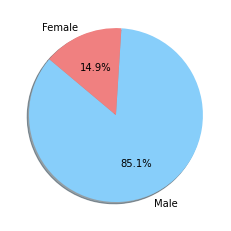

In [29]:
#Pie chart looks a decent option to visualize the data
plt.pie(counts, labels = objects, colors = ['lightskyblue', 'lightcoral'],autopct= '%1.1f%%', shadow=True,
        startangle=140)
plt.show()

### Occupation and salary income

What are the occupations that have higher income?
Is it because men tend to choose to work on occupations that pays better?

#### Number of people with salary higher than 50K per occupation

In [30]:
#Group based on the occupation
df_group = df.groupby('occupation').agg({'income':'sum'})
df_group2 = df.groupby('occupation').agg({'income':'count'})

In [31]:
#Creates the objects and the values
objects = list(df_group.index)
values = list(df_group['income'])

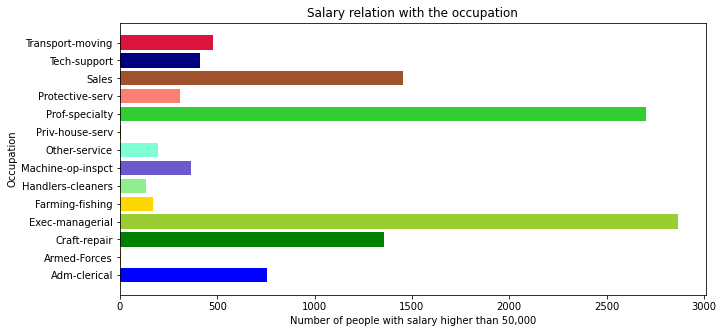

In [32]:
#Plot the bar chars
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
plt.barh(objects, values, color = ['blue', 'orange', 'green', 'yellowgreen', 'gold', 'lightgreen', 'slateblue', 
                                  'aquamarine', 'olive', 'limegreen', 'salmon', 'sienna', 'navy', 'crimson'])
plt.xlabel('Number of people with salary higher than 50,000')
plt.ylabel('Occupation')
plt.title('Salary relation with the occupation')
plt.show()

In [33]:
#This time instead of number, we would see percentages
objects = list(df_group2.index)
values = list(df_group['income']/df_group2['income'])

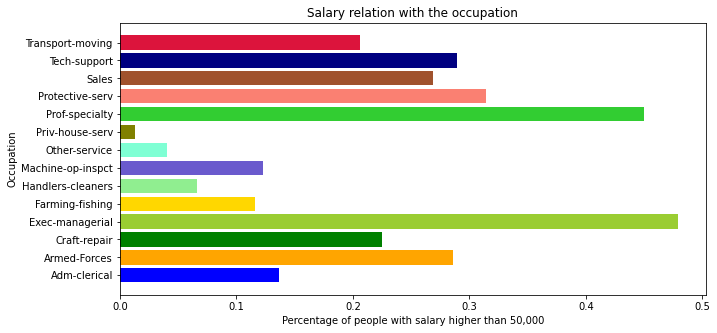

In [34]:
#Plot the figure
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
plt.barh(objects, values, color = ['blue', 'orange', 'green', 'yellowgreen', 'gold', 'lightgreen', 'slateblue', 
                                  'aquamarine', 'olive', 'limegreen', 'salmon', 'sienna', 'navy', 'crimson'])
plt.xlabel('Percentage of people with salary higher than 50,000')
plt.ylabel('Occupation')
plt.title('Salary relation with the occupation')
plt.show()

#### Relation between occupation and gender

In [35]:
#Create data frames
df_prof = df.loc[df['occupation'] == 'Prof-specialty']
df_prof_man = df_prof.loc[df_prof['gender'] == 'Male']
df_prof2 = df.loc[df['occupation'] == 'Prof-specialty']
df_prof_female = df_prof2.loc[df_prof2['gender'] == 'Female']

In [36]:
#See educational level
pd.DataFrame(df_prof['educational-num'].value_counts())

,educational-num
13,2178
14,1260
15,651
10,630
16,424
9,336
11,245
12,203
7,34
6,13


In [37]:
#See the race
pd.DataFrame(df_prof['race'].value_counts())

,race
White,5296
Black,352
Asian-Pac-Islander,271
Amer-Indian-Eskimo,48
Other,41


In [38]:
#Count male values
df_prof_man['income'].value_counts()

1    2132
0    1673
Name: income, dtype: int64

In [39]:
#Count female values
df_prof_female['income'].value_counts()

0    1631
1     572
Name: income, dtype: int64

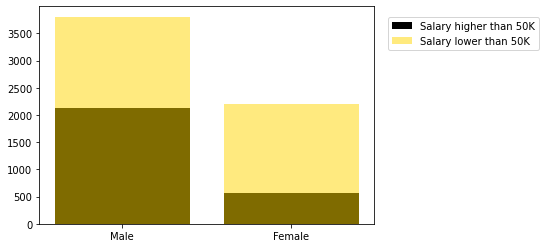

In [40]:
#Creation of the stack chart to compare
objects = ['Male', 'Female']
values = [2132, 572]
values2 = [3805, 2203]
plt.bar(objects, values, label = 'Salary higher than 50K', color = 'black')
plt.bar(objects, values2, label = 'Salary lower than 50K',color = 'gold', alpha = 0.5)
plt.legend(loc = (1.04, 0.8))
plt.show()

In [41]:
#Create both data frames
df_exec = df.loc[df['occupation'] == 'Exec-managerial']
df_exec_man = df_exec.loc[df_exec['gender'] == 'Male']
df_exec2 = df.loc[df['occupation'] == 'Exec-managerial']
df_exec_female = df_exec2.loc[df_exec2['gender'] == 'Female']

In [42]:
#See educational level required to have this position
pd.DataFrame(df_exec['educational-num'].value_counts())

,educational-num
13,1977
10,1277
9,1182
14,762
12,237
11,232
16,83
15,63
7,50
6,42


In [43]:
#Count the race
pd.DataFrame(df_exec['race'].value_counts())

,race
White,5406
Black,336
Asian-Pac-Islander,174
Amer-Indian-Eskimo,48
Other,20


In [44]:
#Count male values
df_exec_man['income'].value_counts()

1    2450
0    1810
Name: income, dtype: int64

In [45]:
#Count female values
df_exec_female['income'].value_counts()

0    1307
1     417
Name: income, dtype: int64

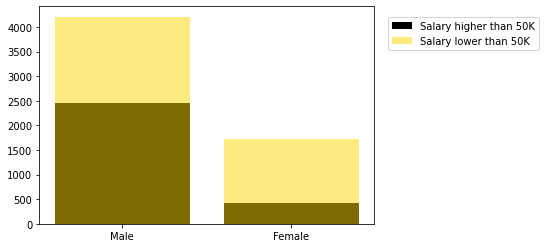

In [46]:
#Creation of the chart
objects = ['Male', 'Female']
values = [2450, 417]
values2 = [4210, 1724]
plt.bar(objects, values, label = 'Salary higher than 50K', color = 'black')
plt.bar(objects, values2, label = 'Salary lower than 50K',color = 'gold', alpha = 0.5)
plt.legend(loc = (1.04, 0.8))
plt.show()

#### Conclusions

1. From the datasets, we conclude that it may exist some inequality of the salary distributions and it could have some influence if the person is a male or a female.


2. This is supported by the fact that according to our pie chart, there are more men earning more than 50K.


3. We can see that males decide to work on professions that pays more. However, the percentage distribution is not equal. Male's percentage of earning more than 50K is higher than female proportion. This is the main reason we are finding some inconsistencies and genre may matter at the time to earn a salary higher than 50K

### Marital status and salary income

Does marital status have any influence on the income?

In [47]:
#Group by marital status
df_group = df.groupby('marital-status').agg({'income':'sum'})
df_group2 = df.groupby('marital-status').agg({'income':'count'})

In [48]:
#See the people with income higher than 50K
df_group['income']

marital-status
Divorced                  655
Married-AF-spouse          14
Married-civ-spouse       9564
Married-spouse-absent      54
Never-married             701
Separated                  99
Widowed                   121
Name: income, dtype: int64

In [49]:
#People that were interviewed
df_group2['income']

marital-status
Divorced                  6297
Married-AF-spouse           32
Married-civ-spouse       21055
Married-spouse-absent      552
Never-married            14598
Separated                 1411
Widowed                   1277
Name: income, dtype: int64

In [50]:
#Creation of the dataframes
df2 = pd.DataFrame([[655, 5643], [14, 18], [9564, 11492], [54, 553], [701, 14605], [99, 1411], [121, 1277]],
                  index = df_group.index, columns = ['More than 50K','Less or equal than 50K'])

df3 = pd.DataFrame([[0.10400127, 0.89599873], [0.4375, 0.5625], [0.45421733, 0.54578267], [0.09764919, 0.90235081], 
                   [0.04799726, 0.95200274], [0.070163, 0.929837], [0.09475333,0.90524667]],
                    index = df_group.index, columns = ['More than 50K','Less or equal than 50K'])

In [51]:
df2

,More than 50K,Less or equal than 50K
marital-status,,
Divorced,655,5643
Married-AF-spouse,14,18
Married-civ-spouse,9564,11492
Married-spouse-absent,54,553
Never-married,701,14605
Separated,99,1411
Widowed,121,1277


<Figure size 756x360 with 0 Axes>

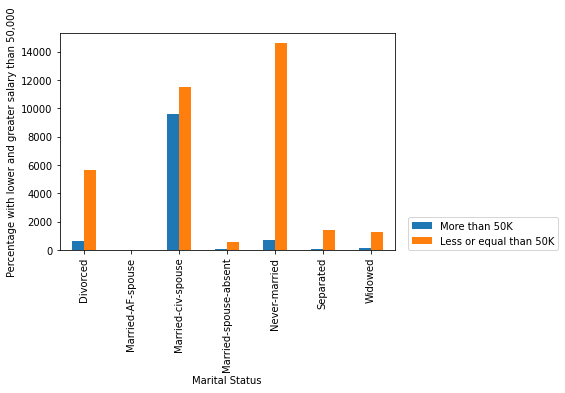

In [52]:
#Plot the figures
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
df2.plot(kind = 'bar')
plt.xlabel('Marital Status')
plt.ylabel('Percentage with lower and greater salary than 50,000')
plt.legend(loc = (1.04, 0))
plt.show()

<Figure size 756x360 with 0 Axes>

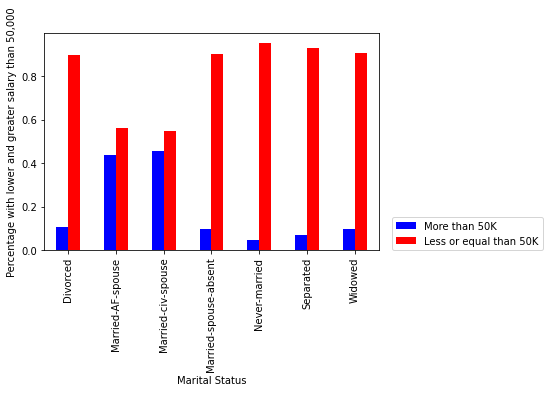

In [53]:
#Plot the percentages
fig = plt.gcf()
fig.set_size_inches(10.5, 5.0)
df3.plot(kind = 'bar', color = ['blue', 'red'])
plt.xlabel('Marital Status')
plt.ylabel('Percentage with lower and greater salary than 50,000')
plt.legend(loc = (1.04, 0))
plt.show()

#### Conclusions

1. Being single does not mean having a salary greater than 50,000.


2. On the other hand, people with salary higher than 50,000 tend to be married. Maybe the salary is a reason to start a marriage. We would never know.


3. On the other marital status, there is a big difference between salaries higher than 50,000 and lower than 50,000.


4. The major insights we can take from the data is that people with higher salaries are married.


5. Or maybe they just work so hard to earn a higher salary because they need it. 

### Educational level and salary income

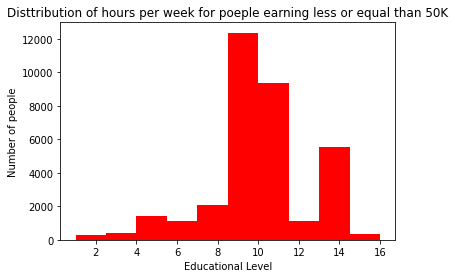

In [57]:
#See how is the distribution of the people that has less or equal than 50K for income
plt.hist(df_0['educational-num'], color = 'red')
plt.xlabel('Educational Level')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning less or equal than 50K')
plt.show()

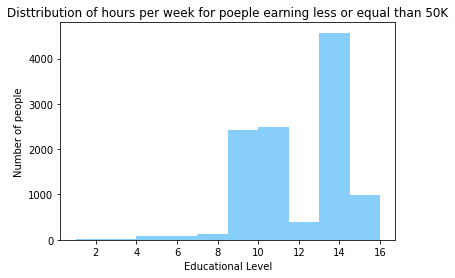

In [58]:
#See how is the distribution of the people that has less or equal than 50K for income
plt.hist(df_1['educational-num'], color = 'lightskyblue')
plt.xlabel('Educational Level')
plt.ylabel('Number of people')
plt.title('Disttribution of hours per week for poeple earning less or equal than 50K')
plt.show()

#### Conclusions

1. In order to have a higher salary in the United States, it is very required to have an education level of at least 8.


2. However, if you have a high level education, not necessarily you will have a salary higher than 50,000.

# Key Takeaways

1. People in the 20's and 30's tend to have a salary lower or equal than 50,000. On the other hand, is more likely that people around 40 and 50 to have a salary than 50,000.


2. Males tend to have higher salaries than females. It seems that genre matters if you would like to expect a salary higher than 50,000. Also, the professions that pays higher, there are more men than women. Important to mention that also the percentage is higher for men than for women.


3. There is not a significant spread between the income earned by Asian and White people. However, the spread is more significant with other races.


4. Maybe after a marriage, people put more effort to earn a higher salary. Maybe a marriage is really expensive! 


5. Hours per week worked does not matter in salary. I can infere this because the distribution of hours per week is similar for people that earns lower or equal than 50,000 and people that earns more than 50,000.


6. Try to be well prepared. Better educational level increases the option to have a job well paid. However, the distribution of eduacation level is similar for both scenarios. 

#### Important to mention

1. The dataset can be biased regarding if for being white they would have better occupation. Most of the people interviewed were white, so we don't have enough information to sustain that for being white they would have better occupations. 

#### And always remember...

##### Education opens up the mind, expands it and allows you to improve your life in so many ways.